Goal: regular experiments with 2 factors
===========================================

Increase sales from an a small online business. 

Data avaialble:

* **S** = free shipping over €30 or over €50  [numeric factor]
* **P** = purchaser must provide a profile    [categorical factor]

In [1]:
from process_improve import *

In [2]:
# S = Free shipping if order amount is €30 or more [-1], or if order amount is over €50 [+1]
S = c(-1, +1, -1, +1, -1, +1, -1, +1, name='Free shipping amount')

# P = Does the purchaser need to create a profile first [+1] or not [-1]?
P = c(-1, -1, +1, +1, -1, -1, +1, +1, name='Create profile: No/Yes')

# Response: daily sales amount
y = c(348, 359, 327, 243, 356, 363, 296, 257, units="€ sales")
    
# Linear model using S, P and S*P to predict the response
expt = gather(S=S, P=P, y=y, title='Experiments to boost sales')
model_sales = lm("y ~ S*P", expt)

In [3]:
summary(model_sales);

              OLS Regression Results: Experiments to boost sales              
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     33.07
Date:                Thu, 03 Oct 2019   Prob (F-statistic):            0.00278
Time:                        10:35:35   Log-Likelihood:                -28.743
No. Observations:                   8   AIC:                             65.49
Df Residuals:                       4   BIC:                             65.80
Residual std error             12.435                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    318.6250      4.396     72.474      0.000     306.419     330.831
S            -13.1250      4.396     -2.985      0.0

The model shows that:

* The $R^2$ value is ____
* The standard error has a value of _____ <units?> which indicates _____
* Compare this standard error of ____ to the spread (the deviation) between repeated experiments run under the same conditions.

Interpretation of the model coefficients
----------------------------------------

* Coefficient **S** has a value of _____, which shows that sales ______ (increase/decrease)  by €13 for every € ____ increase in the free-shipping threshold, keeping all other factors constant.
* Coefficient **P** has a value of _____, which shows that sales ______ (increase/decrease)  by ____ if ______________________, keeping all other factors constant.




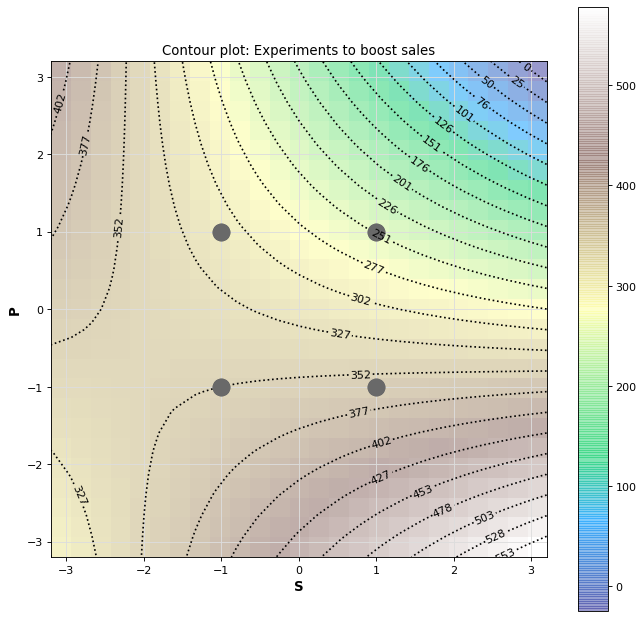

In [4]:
contour_plot(model_sales, dpi=80);

From the contour plot, and the model above, this advice can be given:

* ___
* ___

Experiments with mistakes
===========================

Imagine one experiment was run incorrectly by mistake:

* free shipping was set to €60, and required a profile.
* Instead of € 2570 sales, a value of €2200 was recorded.

*Original model*:

* Intercept: ___
* Effect of **S**: ____
* Effect of **P**: ____

*With the mistake*:

* Intercept: ___
* Effect of **S**: ____
* Effect of **P**: ____

              OLS Regression Results: Experiments to boost sales              
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     50.56
Date:                Thu, 03 Oct 2019   Prob (F-statistic):            0.00123
Time:                        10:35:38   Log-Likelihood:                -28.331
No. Observations:                   8   AIC:                             64.66
Df Residuals:                       4   BIC:                             64.98
Residual std error             11.811                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    317.9167      4.214     75.437      0.000     306.216     329.617
S            -13.4167      3.726     -3.601      0.0

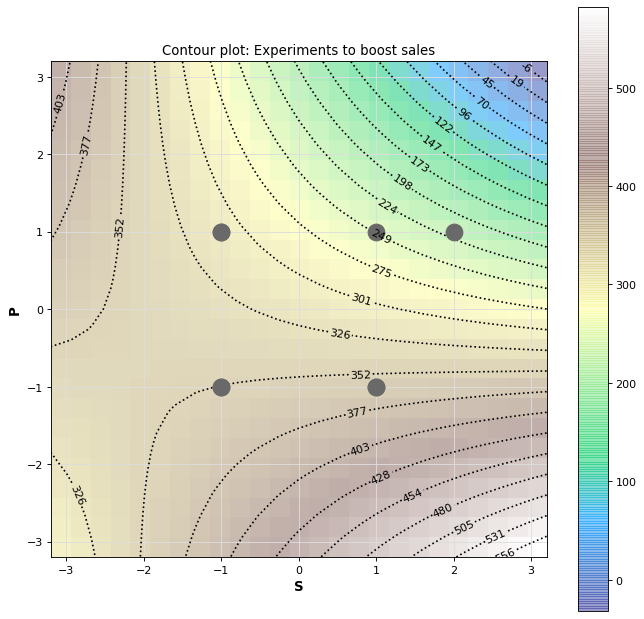

In [5]:
# S = Free shipping if order amount is €30 or more [-1], or if order amount is over €50 [+1]
# Notice that a mistake was made with the last experiment: order minimum for free shipping was €60 [+2].
S = c(-1, +1, -1, +1, -1, +1, -1, +2, name='Free shipping amount')

# P = Does the purchaser need to create a profile first [+1] or not [-1]?
P = c(-1, -1, +1, +1, -1, -1, +1, +1, name='Create profile: No/Yes')

# Response: daily sales amount
y = c(348, 359, 327, 243, 356, 363, 296, 220, units="€ sales")
    
# Linear model using S, P and S*P to predict the response
expt = gather(S=S, P=P, y=y, title='Experiments to boost sales')
model_sales_mistake = lm("y ~ S*P", expt)
summary(model_sales_mistake)
contour_plot(model_sales_mistake, dpi=80);